All_process chỉ có đoạn tìm bes paramaters là ko đưa vô. Còn xem data, dataprocessing all

Link github: https://github.com/buianhkiet110703/REGRESSION/blob/main/Final_test_regression.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm

In [3]:
# Load Data
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv")
# data = pd.read_csv(r"C:\Users\Administrator\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\20222\ML\Source_Codes\ML20222.PredictionBitcoin\data\data.csv")
# print(data.info())
data = data.sort_values('Date', ascending=True).reset_index(drop=True) # drop=True bỏ 'index' col cũ. 

# Use BTC_close_tomorrow as y (Target col) of X_today, instead of BTC_close_today
data["BTC_tomorrow"] = data["BTC_close"].shift(-1)
data = data.drop('BTC_close', axis=1) # drop BTC_close_today
data = data.iloc[:-1] # data = data.drop(data.index[-1])

print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2660 non-null   object 
 1   BTC_open                2660 non-null   float64
 2   BTC_high                2660 non-null   float64
 3   BTC_low                 2660 non-null   float64
 4   difficulty              2660 non-null   int64  
 5   addresses_active_count  2660 non-null   int64  
 6   sum_lock_weight         2660 non-null   int64  
 7   mean_lock_size_ytes     2660 non-null   float64
 8   total_fees_usd          2660 non-null   float64
 9   mean_hash_rate          2660 non-null   float64
 10  xfer_cnt                2660 non-null   int64  
 11  mean_tx_size_usd        2660 non-null   float64
 12  ETH                     2660 non-null   float64
 13  LTC                     2660 non-null   float64
 14  XRP                     2660 non-null   

,Date,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,mean_hash_rate,...,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI,BTC_tomorrow
0,2016-03-10,412.8,417.5,410.3,158427203767,445273,426654988,6.881532e+05,1.731272e+04,1.220696e+06,...,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0,419.1
1,2016-03-11,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,1.260073e+06,...,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0,410.4
2,2016-03-12,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,1.134066e+06,...,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0,412.4
3,2016-03-13,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,1.047436e+06,...,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0,414.3
4,2016-03-14,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,1.197070e+06,...,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0,415.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2023-06-17,26341.3,26767.3,26183.5,52350439455487,863600,559141195,1.724510e+06,1.041701e+06,3.643296e+08,...,76.87,0.47940,0.062193,0.0000,0.00,0.000,0.00,0.0,0.0,26339.7
2656,2023-06-18,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,3.929555e+08,...,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0,26845.9
2657,2023-06-19,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,3.695343e+08,...,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0,28307.7
2658,2023-06-20,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,3.539202e+08,...,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0,29996.9


In [4]:
data.isnull().sum() # number NaN

Date                      0
BTC_open                  0
BTC_high                  0
BTC_low                   0
difficulty                0
addresses_active_count    0
sum_lock_weight           0
mean_lock_size_ytes       0
total_fees_usd            0
mean_hash_rate            0
xfer_cnt                  0
mean_tx_size_usd          0
ETH                       0
LTC                       0
XRP                       0
DOGE                      0
COPPER                    0
GOLD                      0
SILVER                    0
SPX                       0
JP225                     0
DJI                       0
BTC_tomorrow              0
dtype: int64

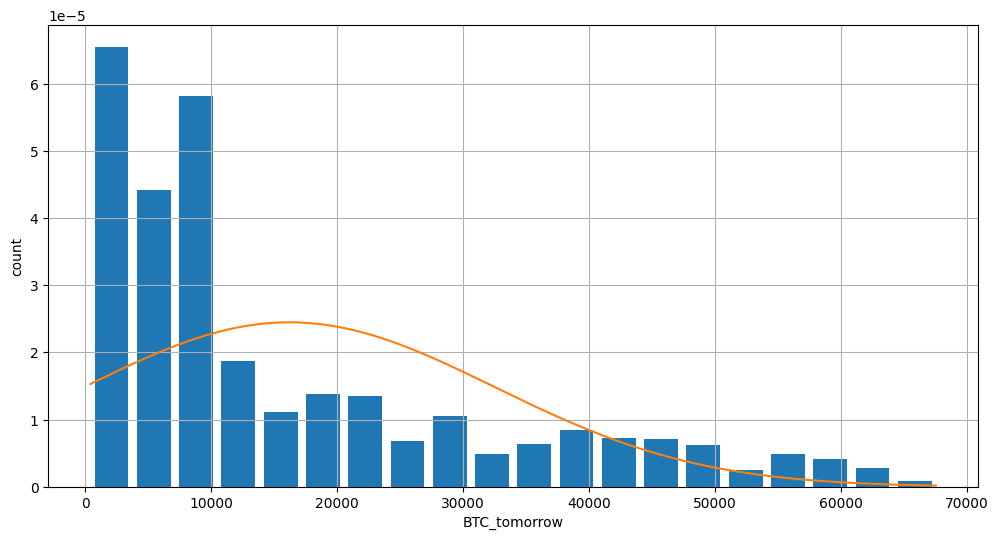

In [5]:
# Histogram 'BTC_tomorrow' with 20 data intervals and the same density scale,
# with Normal distribution of 'BTC_tomorrow'.
plt.figure(figsize=(12,6))
plt.hist(data['BTC_tomorrow'], bins=20, rwidth= 0.8, density=True)
plt.xlabel('BTC_tomorrow')
plt.ylabel('count')

rng= np.arange(data['BTC_tomorrow'].min(), data['BTC_tomorrow'].max(),0.1)
plt.plot(rng, norm.pdf(rng, data['BTC_tomorrow'].mean(), data['BTC_tomorrow'].std()));
plt.grid(True)

Text(0.5, 1.0, 'correlation between variable Profit and Discount')

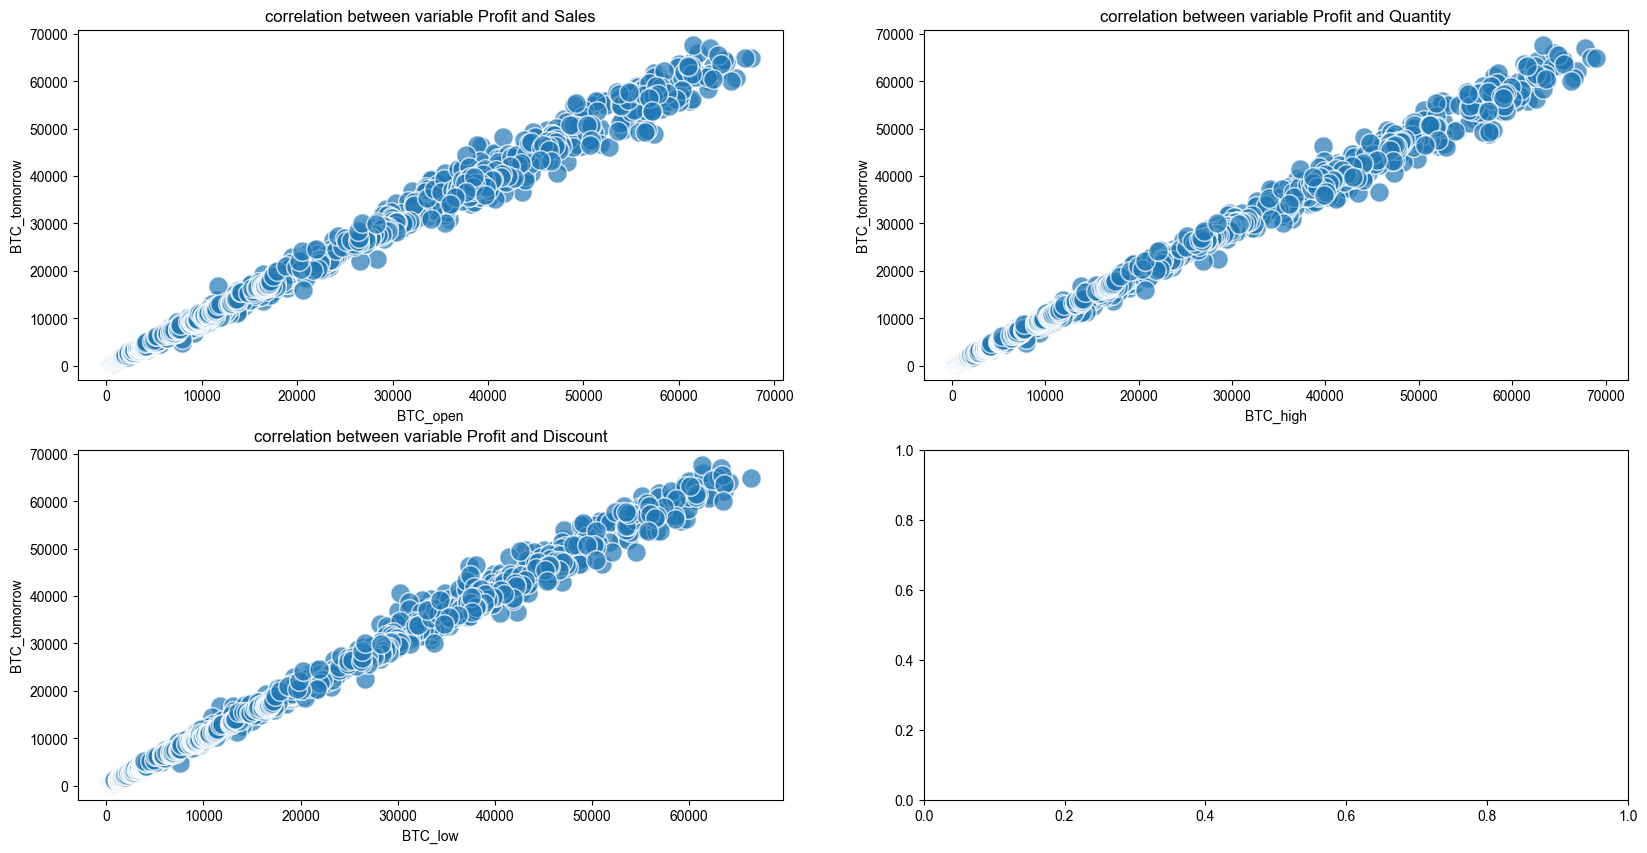

In [6]:
# Correlation (Sự tương quan) between BTC_tomorrow and each independent variable BTC_open, BTC_high, BTC_low of Today
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.set(rc={'axes.facecolor':'lightblue','figure.facecolor':'mediumspringgreen'})
sns.scatterplot(ax=axes[0, 0], data=data, x='BTC_open', y='BTC_tomorrow', s=200, alpha=0.7)
axes[0,0].set_title('correlation between variable Profit and Sales')
sns.scatterplot(ax=axes[0, 1], data=data, x='BTC_high', y='BTC_tomorrow',s=200, alpha=0.7)
axes[0,1].set_title('correlation between variable Profit and Quantity')
sns.scatterplot(ax=axes[1, 0], data=data, x='BTC_low', y='BTC_tomorrow',s=200, alpha=0.7)
axes[1,0].set_title('correlation between variable Profit and Discount')


ValueError: could not convert string to float: '2016-03-10'

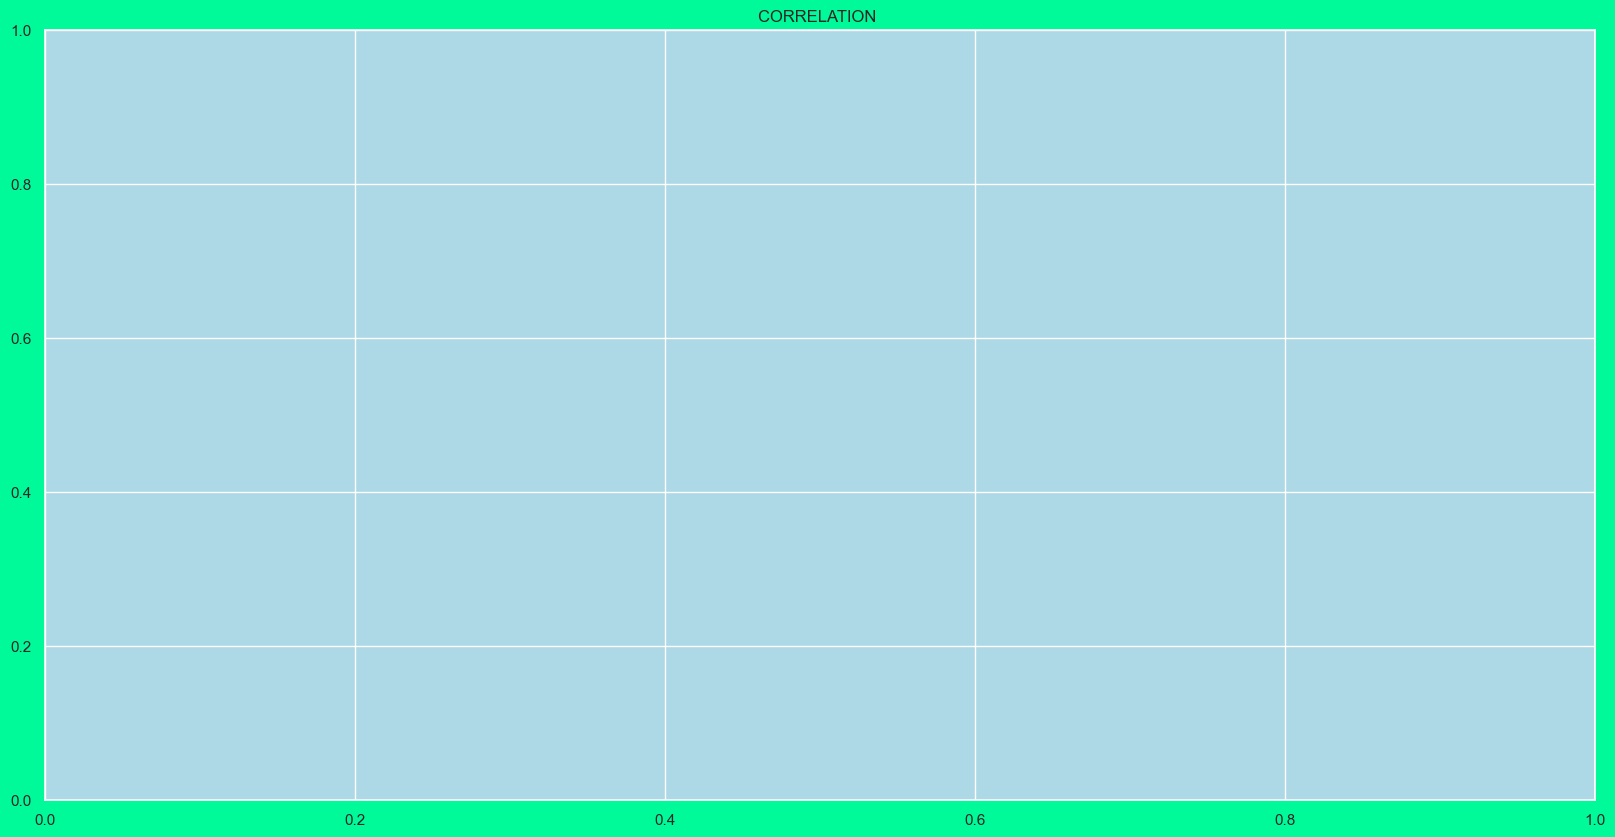

In [7]:
# Heatmap(grid plot-plot dạng lưới): correlation (mối tương quan) between variables in df
plt.figure(figsize=(20,10))
plt.title('CORRELATION ')
corr1= data.corr()
sns.heatmap(corr1, square= True, annot= True, fmt= '.2f', annot_kws= {'size':16}, cmap='Blues', linecolor='white', linewidths=0.5);

In [8]:
import plotly.express as px
fig = px.scatter(df, x = 'Sales', y ='Profit',
                   size='Sales'  , color = 'Segment')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Segment',y='Sales',hue='Category');

ValueError: Could not interpret input 'Segment'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# xóa những dong có id
data= df.drop(['Row ID','Order ID','Order Date','Ship Date','Customer ID','Product ID','Customer Name','City', 'Postal Code','Country','Product Name','Sub-Category','State'], axis= 'columns')

In [ ]:
data.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit,order-ship
0,Second Class,Consumer,South,Furniture,261.9600,2,0.00,41.9136,3
1,Second Class,Consumer,South,Furniture,731.9400,3,0.00,219.5820,3
2,Second Class,Corporate,West,Office Supplies,14.6200,2,0.00,6.8714,4
3,Standard Class,Consumer,South,Furniture,957.5775,5,0.45,-383.0310,7
4,Standard Class,Consumer,South,Office Supplies,22.3680,2,0.20,2.5164,7


# Data processing

In [ ]:
df1= data.drop(['Profit'], axis='columns')
x= df1.values
y= data['Profit'].values

In [ ]:
df1

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,order-ship
0,Second Class,Consumer,South,Furniture,261.9600,2,0.00,3
1,Second Class,Consumer,South,Furniture,731.9400,3,0.00,3
2,Second Class,Corporate,West,Office Supplies,14.6200,2,0.00,4
3,Standard Class,Consumer,South,Furniture,957.5775,5,0.45,7
4,Standard Class,Consumer,South,Office Supplies,22.3680,2,0.20,7
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,South,Furniture,25.2480,3,0.20,2
9990,Standard Class,Consumer,West,Furniture,91.9600,2,0.00,5
9991,Standard Class,Consumer,West,Technology,258.5760,2,0.20,5
9992,Standard Class,Consumer,West,Office Supplies,29.6000,4,0.00,5


In [ ]:
x

array([['Second Class', 'Consumer', 'South', ..., 261.96, 2, 0.0],
       ['Second Class', 'Consumer', 'South', ..., 731.9399999999999, 3,
        0.0],
       ['Second Class', 'Corporate', 'West', ..., 14.62, 2, 0.0],
       ...,
       ['Standard Class', 'Consumer', 'West', ..., 258.576, 2, 0.2],
       ['Standard Class', 'Consumer', 'West', ..., 29.6, 4, 0.0],
       ['Second Class', 'Consumer', 'West', ..., 243.16, 2, 0.0]],
      dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mn= MinMaxScaler(feature_range=(0,1))
x[:, 4:]= mn.fit_transform(x[:,4:])

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ohe= make_column_transformer((OneHotEncoder(),[0,1,2,3]), remainder= 'passthrough')
x= ohe.fit_transform(x)

# Split training and testing

In [13]:
from sklearn.model_selection import train_test_split

# Split data for pre-train
X = data.drop(['BTC_tomorrow', 'Date'], axis=1)
y = data['BTC_tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [17]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import  SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS, mean_absolute_error, mean_squared_error, r2_score
models= [LinearRegression(),RandomForestRegressor(n_estimators=5),GradientBoostingRegressor(learning_rate=0.03, random_state=0),
         AdaBoostRegressor(learning_rate=0.05),
         DecisionTreeRegressor(random_state=0, max_depth=3),
         SVR(kernel='linear', gamma='scale',degree=4),KNeighborsRegressor(n_neighbors=2), 
         xgb.XGBRegressor(learning_rate=0.01), lgb.LGBMRegressor(learning_rate=0.05)];
CV = 10 
entries = []
i=0
for model in models:
    mae_l = []
    mse_l = []
    score= []
    for j in range(CV):
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        score_model= model.score(X_test,y_test) 
        r2_models= r2_score(y_test,y_pred)
        score.append(score_model)
        mae_l.append(mae)
        mse_l.append(mse)
    entries.append([model_name, np.array(mae_l).mean(),np.array(mse_l).mean(),np.array(score).mean()])
    i += 1
model_df = pd.DataFrame(entries, columns=['model_name', 'Mean MAE','Mean MSE','score'])
model_df.sort_values(by=['score'], ascending=False)

: 

# Use best parameters for model.

In [1]:
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import  SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb                                             
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS, mean_absolute_error, mean_squared_error
models= [
LinearRegression(),
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
 max_depth=None,max_features=None,max_leaf_nodes=None,
 max_samples=None,min_impurity_decrease=0.0,
 min_samples_leaf=1,min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 n_estimators=300,
 n_jobs=None,
 oob_score=False,random_state=42,
 verbose=0,
 warm_start=False),
# GradientBoostingRegressor(learning_rate=0.05, max_depth=5,n_estimators=1000),
# DecisionTreeRegressor(),
# KNeighborsRegressor(), 
# xgb.XGBRegressor(),
lgb.LGBMRegressor(boosting_type='dart',
 class_weight=None,
 colsample_bytree=1.0,
 importance_type='split',
 lambda_l1=0.1,
 lambda_l2=0.2,
 learning_rate=0.48,
 max_bin=500,
 max_depth=8,
 metric='rmse',
 min_child_samples=5,
 min_child_weight=0.001,
 min_split_gain=0.0,
 n_estimators=100,
 n_jobs=-1,
 num_leaves=35,
 objective='regression',
 random_state=42,
 reg_alpha=0.0,
 reg_lambda=0.0,
 silent='warn',
 subsample=1.0,
 subsample_for_bin=200000,
 subsample_freq=0),
# AdaBoostRegressor()
]
CV = 10 
entries = []
i=0                                             
for model in models:
    mae_l = []
    mse_l = []
    score= []
    for j in range(CV):
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        score_model= model.score(X_test,y_test) 
        score.append(score_model)
        mae_l.append(mae)
        mse_l.append(mse)
    entries.append([model_name, np.array(mae_l).mean(),np.array(mse_l).mean(),np.array(score).mean()])
    i += 1
model_df = pd.DataFrame(entries, columns=['model_name', 'Mean MAE','Mean MSE','score'])
model_df.sort_values(by=['score'], ascending=False)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg= PolynomialFeatures(degree=3)
x_poly= poly_reg.fit_transform(X_train)
poly_reg.fit(x_poly,y_train)
lin_reg= LinearRegression()
lin_reg.fit(x_poly,y_train)
x_test_poly= poly_reg.fit_transform(X_test)
lin_score= lin_reg.score(x_test_poly, y_test)
y_pred_poly= lin_reg.predict(x_test_poly)
lin_mse= mean_squared_error(y_test,y_pred_poly)
lin_mae= mean_absolute_error(y_test,y_pred_poly)
print('MSE_POLY: ',lin_mse)
print('MAE_POLY: ',lin_mae)
print('SCORE POLY: ',lin_score)

MSE_POLY:  74468.56782104826
MAE_POLY:  39.7468176088044
SCORE POLY:  0.14480231310700176


In [ ]:
from sklearn.ensemble import BaggingRegressor
bg= BaggingRegressor(n_estimators=1000, max_samples=7995,random_state=0)
bg.fit(X_train,y_train)
score= bg.score(X_test,y_test)
y_pred= bg.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  21799.12495604431
MAE:  28.954374305427592
SCORRE:  0.7496586575493227


In [ ]:
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor_LinearRegression = BaggingRegressor(LinearRegression(), random_state=0)
model_BaggingRegressor_LinearRegression.fit(X_train, y_train)
score = model.score(X_test,y_test)
y_pred= model_BaggingRegressor_LinearRegression.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  55427.37282885362
MAE:  61.39688457431841
SCORRE:  0.7582074315048242


In [ ]:
model = BaggingRegressor(RandomForestRegressor(n_estimators=12), random_state=0)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  26937.589566463266
MAE:  30.30115787917453
SCORRE:  0.6906484848336101


In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(max_depth=20), random_state=0)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('SCORRE: ', score)


MSE:  15818.370687695025
MAE:  29.43079687400924
SCORRE:  0.8183416920942959


In [ ]:
cv_df= {
 'model_name':['PolynomialFeatures(degree=3)','BaggingRegressor','BaggingRegressor(LinearRegression)',
 'BaggingRegressor(RandomForestRegressor)','BaggingRegressor(DecisionTreeRegressor)'],
 'Mean MAE':[39.707817458729366, 28.954374305427592, 61.37902788738119, 29.84634918392471,29.43079687400924],   
 'Mean MSE':[73621.49870775724, 21799.12495604431, 55438.6410992574, 27310.201803991837, 15818.370687695025],
 'score':[0.15453006224360089, 0.7496586575493227,0.014684260264121507,0.6863694026252856,0.8183416920942959]
}
df2= pd.DataFrame(cv_df)
df2

,model_name,Mean MAE,Mean MSE,score
0,PolynomialFeatures(degree=3),39.707817,73621.498708,0.154530
1,BaggingRegressor,28.954374,21799.124956,0.749659
2,BaggingRegressor(LinearRegression),61.379028,55438.641099,0.014684
3,BaggingRegressor(RandomForestRegressor),29.846349,27310.201804,0.686369
4,BaggingRegressor(DecisionTreeRegressor),29.430797,15818.370688,0.818342


In [ ]:
total= pd.concat([model_df, df2],ignore_index=True)
total.sort_values(by=['score'], ascending=False)

,model_name,Mean MAE,Mean MSE,score
3,DecisionTreeRegressor,31.757690,15691.547961,0.819798
13,BaggingRegressor(DecisionTreeRegressor),29.430797,15818.370688,0.818342
1,RandomForestRegressor,29.515135,16050.841598,0.815672
2,GradientBoostingRegressor,27.960924,16784.440532,0.807247
6,XGBRegressor,30.765939,18365.652737,0.789089
8,AdaBoostRegressor,39.143028,20260.350185,0.767330
10,BaggingRegressor,28.954374,21799.124956,0.749659
12,BaggingRegressor(RandomForestRegressor),29.846349,27310.201804,0.686369
7,LGBMRegressor,31.371738,36028.629261,0.586247
0,LinearRegression,61.988581,56313.767646,0.353292
